In [1]:
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(root_dir)
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats


import functions

/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#SWI after cross validation
swi = {'A': 0.8356471476582918,
 'C': 0.5208088354857734,
 'E': 0.9876987431418378,
 'D': 0.9079044671339564,
 'G': 0.7997168496420723,
 'F': 0.5849790194237692,
 'I': 0.6784124413866582,
 'H': 0.8947913996466419,
 'K': 0.9267104557513497,
 'M': 0.6296623675420369,
 'L': 0.6554221515081433,
 'N': 0.8597433107431216,
 'Q': 0.789434648348208,
 'P': 0.8235328714705341,
 'S': 0.7440908318492778,
 'R': 0.7712466317693457,
 'T': 0.8096922697856334,
 'W': 0.6374678690957594,
 'V': 0.7357837119163659,
 'Y': 0.6112801822947587}

#pET dataset
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
pET['Amino acid solubility index'] = pET['Protein'].apply(lambda x:np.mean(functions.solubility_score(x, swi)))


X = pET['Amino acid solubility index']
Y = pET['Solubility']
X2 = sm.add_constant(X)

logit = sm.Logit(Y, X2)
result = logit.fit()
result.summary()



/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.566955
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Solubility   No. Observations:                12216
Model:                          Logit   Df Residuals:                    12214
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.1016
Time:                        14:47:49   Log-Likelihood:                -6925.9
converged:                       True   LL-Null:                       -7708.9
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -62.7775      1.815    -34.597      0.000     -66.334     -59.221
Amino acid solubility index    81.0581      2.320     34.940      0.000      76.511      85.605
===============================================================================================
"""

/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


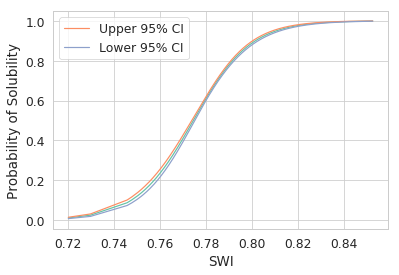

In [4]:
#plot fitted values with their CI

# estimate confidence interval for predicted probabilities

proba = result.predict(X2)
cov = result.cov_params()
gradient = (proba * (1 - proba) * X2.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient.values])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))



functions.sns.lineplot(X, proba)
functions.sns.lineplot(X, upper, label="Upper 95% CI")
functions.sns.lineplot(X, lower, label="Lower 95% CI")
#plt.fill_between(X, upper, lower, color='k', alpha=.15)



functions.plt.ylabel('Probability of Solubility')
functions.plt.xlabel('SWI')
# functions.sns.despine()
# functions.plt.savefig("figs/Logistic_regression_fit.pdf")
functions.plt.show()

functions.plt.clf()
functions.plt.close('all')
